In [1]:
from sympy import Symbol, init_printing, conjugate, sin, cos, factor, Matrix
from sympy import lambdify, Symbol, symbols
from sympy.physics.quantum import Dagger
init_printing()

In [2]:
from diagram_v2 import all_diagrams


--- Calculating H10 Interactions ---

--- Calculating Z1 Interactions ---

--- Defining Lepton Interactions with charged fields ---

Refactored script execution finished.


INFO: --- Creating Diagram: triangle_ni_GLp_GLm (FSS) ---
INFO: Vertex 1 ({{H_1^0}}-{{G_L^+}}-{{G_L^-}}) coupling found: -k_1*(\alpha_1**2 + 2*\alpha_1*\alpha_3 + \alpha_3**2 - 4*\lambda_1*\rho_1 - 4*\lambda_2*\rho_1)/\rho_1
INFO: Vertex 2 ({{G_L^+}}-\overline{n}[i]-\ell[b]) coupling found: L=-sqrt(2)*T_{RL}[i, b]/k_1, R=sqrt(2)*conjugate(Q_L[b, i])*m_\ell[b]/k_1
INFO: Vertex 3 ({{G_L^-}}-\overline{\ell}[a]-n[i]) coupling found: L=sqrt(2)*Q_L[a, i]*m_\ell[a]/k_1, R=-sqrt(2)*conjugate(T_{RL}[i, a])/k_1
INFO: Mass List for TriangleFSS: [m_{H_1^0}, m_\ell[a], m_\ell[b], mn[i], m_{W_1}, m_{W_1}]
INFO: Successfully created triangle_ni_GLp_GLm (FSS)
INFO: --- Creating Diagram: triangle_ni_GRp_GRm (FSS) ---
INFO: Vertex 1 ({{H_1^0}}-{{G_R^+}}-{{G_R^-}}) coupling found: -k_1**3*(\alpha_1**2 + 2*\alpha_1*\alpha_3 + \alpha_3**2 - 4*\lambda_1*\rho_1 - 4*\lambda_2*\rho_1)/(\rho_1*v_R**2)
INFO: Vertex 2 ({{G_R^+}}-\overline{n}[i]-\ell[b]) coupling found: L=-sqrt(2)*conjugate(Q_R[b, i])*m_\ell[b]/v_

28 diagrams created and stored in all_diagrams dictionary.


In [3]:
list(all_diagrams.keys())

['ni_GLp_GLm',
 'ni_GRp_GRm',
 'ni_HRp_HRm',
 'ni_GRp_HRm',
 'ni_HRp_GRm',
 'ni_W1p_W1m',
 'ni_W2p_W2m',
 'ni_W1p_GLm',
 'ni_W2p_GRm',
 'ni_W2p_HRm',
 'ni_GLp_W1m',
 'ni_GRp_W2m',
 'ni_HRp_W2m',
 'ni_W1',
 'ni_W2',
 'W1_ni',
 'W2_ni',
 'ni_GL',
 'ni_GR',
 'ni_HR',
 'GL_ni',
 'GR_ni',
 'HR_ni',
 'GL_ninj',
 'GR_ninj',
 'HR_ninj',
 'W1_ninj',
 'W2_ninj']

In [4]:
all_diagrams['ni_GLp_GLm'].AL().atoms(Symbol)

INFO: generated new fontManager


In [5]:
freesymbols = set()
for interaction, diagram in all_diagrams.items():
    freesymbols |= diagram.AL().atoms(Symbol)

In [6]:
freesymbols

We have the following definitions
$$
Q_{L}^{\dagger} = U_{L}^{\dagger}V_{L}^{\ell}\\
Q_{R}^{\dagger} = U_{R}^{\top}V_{R}^{\ell}
$$
in the case of $V_{L}^{\ell} = V_{R}^{\ell} = \mathbf{I}$, we have

$$
Q_{L}^{\dagger} = U_{L}^{\dagger}\\
Q_{R}^{\dagger} = U_{R}^{\top}
$$

In [7]:
from DLRSM1.block_diagonalization_iss import ULmni, URmni, USmni, I3, eigenvalsMnu, mNi_changes, epsilon, mNi
from DLRSM1.block_diagonalization_iss import dict_Mii2, dict_muii, dict_Mii2_sqrt, dict_sqrt_muii_MDi, dict_Mii, mns_dummys, dummys_mns
from DLRSM1.block_diagonalization_iss import Unu

Key: M[0, 0]**2, Value: m_{n_4}*(m_{n_4} - mu[0, 0])


Key: M[1, 1]**2, Value: m_{n_5}*(m_{n_5} - mu[1, 1])


Key: M[2, 2]**2, Value: m_{n_6}*(m_{n_6} - mu[2, 2])




In [8]:
URmat = URmni
URT = URmat.T
URc = conjugate(URmat)
URDagger = Dagger(URmat)
ULmat = ULmni
ULT = ULmat.T
ULc = conjugate(ULmat)
ULDagger = Dagger(ULmat)
USmat = USmni
UST = USmat.T
USc = conjugate(USmat)
USDagger = Dagger(USmat)
Vl = I3

In [9]:
eigenvalsMnu = eigenvalsMnu.subs(mNi_changes)

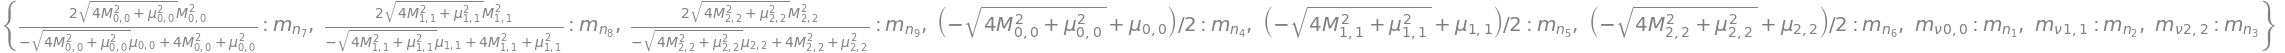

In [10]:
mNi_changes

In [11]:
dict_Mii

In [12]:
(-mNi[4] + mNi[7]).subs(
    {
        val:key for key, val in mNi_changes.items()
    }
).factor().subs(dict_sqrt_muii_MDi).subs(dict_Mii2).subs(dict_muii).factor()

In [13]:
GRLmat = (URT*conjugate(URmat)*(eigenvalsMnu)*ULDagger*ULc).applyfunc(
    lambda x:x.factor()
).replace(
    sin(epsilon), sin(epsilon)
).subs(dict_Mii2).subs(dict_muii).subs(dict_Mii2_sqrt).applyfunc(
    lambda x:x.factor(deep=True)
).subs(mns_dummys).simplify().subs(dummys_mns)

GSRmat = (USDagger*USc*(eigenvalsMnu)*URDagger*URc).applyfunc(
    lambda x:x.factor()
).replace(
    sin(epsilon), sin(epsilon)
).subs(dict_Mii2).subs(dict_muii).subs(dict_Mii2_sqrt).applyfunc(
    lambda x:x.factor(deep=True)
).subs(mns_dummys).simplify().subs(dummys_mns)

In [14]:
GRLmat

⎡                      0                                               0       ↪
⎢                                                                              ↪
⎢                      0                                               0       ↪
⎢                                                                              ↪
⎢                      0                                               0       ↪
⎢                                                                              ↪
⎢   _________                                       _________                  ↪
⎢ ╲╱ m_{n_4} ⋅m_{n_7}⋅sin(\epsilon)⋅U_{\nu}_00    ╲╱ m_{n_4} ⋅m_{n_7}⋅sin(\eps ↪
⎢ ────────────────────────────────────────────    ──────────────────────────── ↪
⎢              ___________________                             _______________ ↪
⎢            ╲╱ m_{n_4} - m_{n_7}                            ╲╱ m_{n_4} - m_{n ↪
⎢                                                                              ↪
⎢   _________               

In [15]:
GSRmat

⎡             _________                                       _________        ↪
⎢         ⅈ⋅╲╱ m_{n_4} ⋅m_{n_7}⋅sin(\epsilon)⋅U_{\nu}_00  ⅈ⋅╲╱ m_{n_5} ⋅m_{n_8 ↪
⎢0  0  0  ──────────────────────────────────────────────  ──────────────────── ↪
⎢                       ____________________                            ______ ↪
⎢                     ╲╱ -m_{n_4} + m_{n_7}                           ╲╱ -m_{n ↪
⎢                                                                              ↪
⎢             _________                                       _________        ↪
⎢         ⅈ⋅╲╱ m_{n_4} ⋅m_{n_7}⋅sin(\epsilon)⋅U_{\nu}_01  ⅈ⋅╲╱ m_{n_5} ⋅m_{n_8 ↪
⎢0  0  0  ──────────────────────────────────────────────  ──────────────────── ↪
⎢                       ____________________                            ______ ↪
⎢                     ╲╱ -m_{n_4} + m_{n_7}                           ╲╱ -m_{n ↪
⎢                                                                              ↪
⎢             _________     

In [238]:
from DLRSM1.potential_senjanovic_HiggsDoublets import alpha1, alpha3, rho1, k1, vR
from DLRSM1.Gauge_Higgs_senjanovic_HiggsDoublets import mW1, mW2

In [17]:
a13 = alpha1 + alpha3
Gamma_mat = (GRLmat - ((a13)/(2*rho1))*epsilon**2*Dagger(GSRmat)).subs(mns_dummys).simplify().subs(dummys_mns).applyfunc(
    lambda x:x.subs(sin(epsilon)**2, epsilon**2).factor(deep=True)
)

Omega_mat = (Gamma_mat + Gamma_mat.T).applyfunc(lambda x:x.expand().collect(rho1, factor))#.replace(epsilon**2,0)

In [18]:
Omega_mat

⎡                                                                              ↪
⎢                                                                              ↪
⎢                                                               0              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                               0              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                           

In [19]:
QLDagger = (ULDagger*Vl).subs(mns_dummys).simplify().subs(dummys_mns)
QLmat = Dagger(QLDagger).subs(mns_dummys).simplify().subs(dummys_mns)

QRDagger = (URT*Vl).subs(mns_dummys).simplify().subs(dummys_mns)
QRmat = Dagger(QRDagger).subs(mns_dummys).simplify().subs(dummys_mns)

In [20]:
QLDagger

⎡        U_{\nu}_00                   U_{\nu}_10                   U_{\nu}_20  ↪
⎢                                                                              ↪
⎢        U_{\nu}_01                   U_{\nu}_11                   U_{\nu}_21  ↪
⎢                                                                              ↪
⎢        U_{\nu}_02                   U_{\nu}_12                   U_{\nu}_22  ↪
⎢                                                                              ↪
⎢    _________                                                                 ↪
⎢ⅈ⋅╲╱ m_{n_4} ⋅sin(\epsilon)                                                   ↪
⎢───────────────────────────               0                            0      ↪
⎢    ____________________                                                      ↪
⎢  ╲╱ -m_{n_4} + m_{n_7}                                                       ↪
⎢                                                                              ↪
⎢                           

In [21]:
SRLmat = (QRmat*(eigenvalsMnu)*ULDagger*ULmat).applyfunc(
    lambda x:x.factor()
).replace(
    sin(epsilon), sin(epsilon)
).subs(dict_Mii2).subs(dict_muii).subs(dict_Mii2_sqrt).applyfunc(
    lambda x:x.factor(deep=True)
).subs(mns_dummys).simplify().subs(dummys_mns)
SRLmat

⎡                                                                              ↪
⎢     _________   _________               __________       _________   _______ ↪
⎢-ⅈ⋅╲╱ m_{n_4} ⋅╲╱ m_{n_7} ⋅sin(\epsilon)⋅U_{\nu}_00  -ⅈ⋅╲╱ m_{n_4} ⋅╲╱ m_{n_7 ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢     _________   _________               __________       _________   _______ ↪
⎢-ⅈ⋅╲╱ m_{n_5} ⋅╲╱ m_{n_8} ⋅sin(\epsilon)⋅U_{\nu}_10  -ⅈ⋅╲╱ m_{n_5} ⋅╲╱ m_{n_8 ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                           

In [22]:
TRLmat = (URT*URc*(eigenvalsMnu)*QLDagger).applyfunc(
    lambda x:x.factor()
).replace(
    sin(epsilon), sin(epsilon)
).subs(dict_Mii2).subs(dict_muii).subs(dict_Mii2_sqrt).applyfunc(
    lambda x:x.factor(deep=True)
).subs(mns_dummys).simplify().subs(dummys_mns)
TRLDagger = Dagger(TRLmat).subs(mns_dummys).simplify().subs(dummys_mns)
TRLDagger

⎡             _________                                                        ↪
⎢         ⅈ⋅╲╱ m_{n_4} ⋅m_{n_7}⋅sin(\epsilon)                                  ↪
⎢0  0  0  ───────────────────────────────────                   0              ↪
⎢                 ____________________                                         ↪
⎢               ╲╱ -m_{n_4} + m_{n_7}                                          ↪
⎢                                                                              ↪
⎢                                                  _________                   ↪
⎢                                              ⅈ⋅╲╱ m_{n_5} ⋅m_{n_8}⋅sin(\epsi ↪
⎢0  0  0                   0                   ─────────────────────────────── ↪
⎢                                                      ____________________    ↪
⎢                                                    ╲╱ -m_{n_5} + m_{n_8}     ↪
⎢                                                                              ↪
⎢                           

In [23]:
TSRmat = (USDagger*USc*(eigenvalsMnu)*URDagger*Vl).applyfunc(
    lambda x:x.factor()
).replace(
    sin(epsilon), sin(epsilon)
).subs(dict_Mii2).subs(dict_muii).subs(dict_Mii2_sqrt).applyfunc(
    lambda x:x.factor(deep=True)
).subs(mns_dummys).simplify().subs(dummys_mns)
TSRDagger = Dagger(TSRmat).subs(mns_dummys).simplify().subs(dummys_mns)
TSRDagger

⎡                                                                              ↪
⎢     _________   _________               __________       _________   _______ ↪
⎢-ⅈ⋅╲╱ m_{n_4} ⋅╲╱ m_{n_7} ⋅sin(\epsilon)⋅U_{\nu}_00  -ⅈ⋅╲╱ m_{n_4} ⋅╲╱ m_{n_7 ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢     _________   _________               __________       _________   _______ ↪
⎢-ⅈ⋅╲╱ m_{n_5} ⋅╲╱ m_{n_8} ⋅sin(\epsilon)⋅U_{\nu}_10  -ⅈ⋅╲╱ m_{n_5} ⋅╲╱ m_{n_8 ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                           

In [24]:
Kmat = (SRLmat - epsilon**2*TSRDagger).applyfunc(
    lambda x:x.factor()
).replace(
    sin(epsilon), sin(epsilon)
).subs(dict_Mii2).subs(dict_muii).subs(dict_Mii2_sqrt).applyfunc(
    lambda x:x.factor(deep=True)
).subs(mns_dummys).simplify().subs(dummys_mns)
KDagger = Dagger(Kmat).subs(mns_dummys).simplify().subs(dummys_mns)


Jmat = (TSRDagger + SRLmat).applyfunc(
    lambda x:x.factor()
).replace(
    sin(epsilon), sin(epsilon)
).subs(dict_Mii2).subs(dict_muii).subs(dict_Mii2_sqrt).applyfunc(
    lambda x:x.factor(deep=True)
).subs(mns_dummys).simplify().subs(dummys_mns)
JDagger = Dagger(Jmat).subs(mns_dummys).simplify().subs(dummys_mns)


In [25]:
KDagger.subs(sin(epsilon)**2, epsilon**2)

⎡    _________   _________ ⎛            2⎞                               _____ ↪
⎢ⅈ⋅╲╱ m_{n_4} ⋅╲╱ m_{n_7} ⋅⎝1 - \epsilon ⎠⋅sin(\epsilon)⋅U_{\nu}_00  ⅈ⋅╲╱ m_{n ↪
⎢                                                                              ↪
⎢    _________   _________ ⎛            2⎞                               _____ ↪
⎢ⅈ⋅╲╱ m_{n_4} ⋅╲╱ m_{n_7} ⋅⎝1 - \epsilon ⎠⋅sin(\epsilon)⋅U_{\nu}_01  ⅈ⋅╲╱ m_{n ↪
⎢                                                                              ↪
⎢    _________   _________ ⎛            2⎞                               _____ ↪
⎢ⅈ⋅╲╱ m_{n_4} ⋅╲╱ m_{n_7} ⋅⎝1 - \epsilon ⎠⋅sin(\epsilon)⋅U_{\nu}_02  ⅈ⋅╲╱ m_{n ↪
⎢                                                                              ↪
⎢                           2           _________                              ↪
⎢                -2⋅\epsilon ⋅m_{n_4}⋅╲╱ m_{n_7}                               ↪
⎢                ─────────────────────────────────                             ↪
⎢                       ____

In [26]:
JDagger.subs(cos(epsilon),1)

⎡      _________   _________                                 _________   _____ ↪
⎢2⋅ⅈ⋅╲╱ m_{n_4} ⋅╲╱ m_{n_7} ⋅sin(\epsilon)⋅U_{\nu}_00  2⋅ⅈ⋅╲╱ m_{n_5} ⋅╲╱ m_{n ↪
⎢                                                                              ↪
⎢      _________   _________                                 _________   _____ ↪
⎢2⋅ⅈ⋅╲╱ m_{n_4} ⋅╲╱ m_{n_7} ⋅sin(\epsilon)⋅U_{\nu}_01  2⋅ⅈ⋅╲╱ m_{n_5} ⋅╲╱ m_{n ↪
⎢                                                                              ↪
⎢      _________   _________                                 _________   _____ ↪
⎢2⋅ⅈ⋅╲╱ m_{n_4} ⋅╲╱ m_{n_7} ⋅sin(\epsilon)⋅U_{\nu}_02  2⋅ⅈ⋅╲╱ m_{n_5} ⋅╲╱ m_{n ↪
⎢                                                                              ↪
⎢                          _________                                           ↪
⎢                m_{n_4}⋅╲╱ m_{n_7}                                            ↪
⎢               ──────────────────────                                         ↪
⎢                 __________

In [301]:
from DLRSM1.FeynmanRules_senjanovic_H10_Z1_GM import QL, QR, TRL, K, J, Omega, ml, mn, i, j, a, b

In [302]:
mla, mlb, mni = symbols('m_{l_a}, m_{l_b}, m_{n_i}', positive=True)

QLai = symbols('Q_{Lai}')
QLbic = symbols(r'\overline{Q_{Lbi}}')
QRai = symbols('Q_{Rai}')
QRbic = symbols(r'\overline{Q_{Rbi}}')
TRLib = symbols('T_{RLib}')
TRLiac  = symbols(r'\overline{T_{RLia}}')
Jai = symbols('J_{ai}')
Jbic = symbols(r'\overline{J_{bi}}')

symbolic_changes = {
    ml[a]:mla,
    ml[b]:mlb,
    mn[i]:mni,
    QL[a,i]:QLai,
    conjugate(QL[b, i]):QLbic,
    QR[a,i]:QRai,
    conjugate(QR[b, i]):QRbic,
    TRL[i, b]:TRLib,
    conjugate(TRL[i, a]):TRLiac,
    J[a,i]:Jai,
    conjugate(J[b,i]):Jbic
}
symbolic_formfactor = {
    interaction:{
        'AL':diagram.AL().factor().subs(symbolic_changes),
        'AR':diagram.AR().factor().subs(symbolic_changes)
    } for interaction, diagram in all_diagrams.items()
}

In [303]:
symbolic_formfactor['ni_GR']['AL'].atoms(Symbol)

In [304]:
symbolic_formfactor['ni_GR']['AL']#.atoms(Symbol)

             ⎛                                  2                              ↪
√2⋅ⅈ⋅m_{l_b}⋅⎝- J_{ai}⋅\overline{J_{bi}}⋅m_{l_a} ⋅B₁ ₁(m_{l_a}, m_{n_i}, m_{W_ ↪
────────────────────────────────────────────────────────────────────────────── ↪
                                                                               ↪
                                                                               ↪

↪                                        2                                     ↪
↪ 2}) + J_{ai}⋅\overline{Q_{Rbi}}⋅m_{l_b} ⋅m_{n_i}⋅B₁ ₀(m_{l_a}, m_{n_i}, m_{W ↪
↪ ──────────────────────────────────────────────────────────────────────────── ↪
↪                                                         2       2            ↪
↪                                                      8⋅π ⋅k₁⋅v_R ⋅(m_{l_a} - ↪

↪                                         2                                    ↪
↪ _2}) + Q_{Rai}⋅\overline{J_{bi}}⋅m_{l_a} ⋅m_{n_i}⋅B₁ ₀(m_{l_a}, m_{n_i}, m_{ ↪
↪ ────────────────────────

In [305]:
from neutrinos import UpmnsStandardParametrization, NuOscObservables
Nudata = NuOscObservables
th12,th13,th23 = symbols(r'\theta_{12}, \theta_{13}, \theta_{23}')
mixing_angles = Nudata().substitutions(th12,th13,th23)
c12,c13,c23 = cos(th12), cos(th13), cos(th23)
s12,s13,s23 = sin(th12), sin(th13), sin(th23)
Upmns_val = UpmnsStandardParametrization(th12,th13,th23).subs(mixing_angles)

Unu_changes = {
        Unu[i,j]:Upmns_val[i,j] for i in range(3) for j in range(3)
    }

In [306]:
TRLmat.subs(
    Unu_changes
)

⎡                 0                                    0                       ↪
⎢                                                                              ↪
⎢                 0                                    0                       ↪
⎢                                                                              ↪
⎢                 0                                    0                       ↪
⎢                                                                              ↪
⎢   _________                                                                  ↪
⎢ ╲╱ m_{n_4} ⋅m_{n_7}⋅sin(\epsilon)                                            ↪
⎢ ─────────────────────────────────                    0                       ↪
⎢         ___________________                                                  ↪
⎢       ╲╱ m_{n_4} - m_{n_7}                                                   ↪
⎢                                                                              ↪
⎢                           

In [307]:
QLmat.atoms(Symbol)

In [308]:
#from LFVXD.numeric.mpmath_definitions import B1_0, B1_1

In [309]:
from LFVXD.numeric.qcdloop_pv import B0, B1

In [310]:
symbolic_formfactor['ni_GR']['AL'].atoms(Symbol)

In [311]:
function_formfactors = {
    'ni_GL':{
        'AL':lambdify(
    [QLai, QLbic, TRLib, TRLiac, mW1, mni, mla, mlb, k1],
    symbolic_formfactor['ni_GL']['AL'], modules=[{'B1_0':B0, 'B1_1':B1},'mpmath']
    ),
        'AR':lambdify(
    [QLai, QLbic, TRLib, TRLiac, mW1, mni, mla, mlb, k1],
    symbolic_formfactor['ni_GL']['AR'], modules=[{'B1_0':B0, 'B1_1':B1},'mpmath']
    )
    },
    'ni_GR':{
        'AL':lambdify(
    [QRai, QRbic, Jai, Jbic, mW2, mni, mla, mlb, k1, vR],
    symbolic_formfactor['ni_GR']['AL'], modules=[{'B1_0':B0, 'B1_1':B1},'mpmath']
    ),
        'AR':lambdify(
    [QRai, QRbic, Jai, Jbic, mW2, mni, mla, mlb, k1, vR],
    symbolic_formfactor['ni_GR']['AR'], modules=[{'B1_0':B0, 'B1_1':B1},'mpmath']
    )
    },
}

In [327]:
function_formfactors['ni_GR']['AR'](1,2,3,4,5,6,7,8,9,10)

mpc(real='1.8846699840068486e-18', imag='0.0031832933651148301')

In [328]:
function_formfactors['ni_GR']['AL'](1,2,3,4,5,6,7,8,9,10)

mpc(real='1.4135024880051359e-18', imag='-0.00050527237044074727')

In [313]:
function_formfactors['ni_GL']['AR'](1,2,3,4,5,6,7,8,9)

mpc(real='3.2768439022341294e-18', imag='0.0084289688945250237')

In [314]:
AR_lamb(1,2,3,4,5,6,7,8,9)

mpc(real='3.2768439022341294e-18', imag='0.0084289688945250237')

In [315]:
import mpmath as mp
mp.dps = 120; mp.pretty = True

In [316]:
k1_val = mp.mpf('246')
vR_val = mp.mpf('5000')
epsilon_val = k1_val/vR_val

d21 = mp.mpf(str(Nudata.squareDm21.central))*mp.mpf('1e-18')# factor to convert eV^2 to GeV^2
d31 = mp.mpf(str(Nudata.squareDm31.central))*mp.mpf('1e-18')
mn1_val = mp.mpf('1e-12')  #GeV 
mn2_val = mp.sqrt(mn1_val**2 + d21)
mn3_val = mp.sqrt(mn1_val**2 + d31)
mn4_val = mp.mpf('1000')
mn5_val = mp.mpf('2000')
mn6_val = mp.mpf('3000')
mn7_val = mn4_val + epsilon_val
mn8_val = mn5_val + epsilon_val
mn9_val = mn6_val + epsilon_val 
mni_vals = [
    mn1_val,
    mn2_val,
    mn3_val,
    mn4_val,
    mn5_val,
    mn6_val,
    mn7_val,
    mn8_val,
    mn9_val
]
me_val = mp.mpf('0.001')
mmu_val = mp.mpf('0.105')
mtau_val = mp.mpf('1.776')
ml_vals = [
    me_val,
    mmu_val,
    mtau_val
]


In [317]:
QRmat

⎡                _________                                                     ↪
⎢              ╲╱ m_{n_7}                                                      ↪
⎢0  0  0  ──────────────────────            0                       0          ↪
⎢           ____________________                                               ↪
⎢         ╲╱ -m_{n_4} + m_{n_7}                                                ↪
⎢                                                                              ↪
⎢                                        _________                             ↪
⎢                                      ╲╱ m_{n_8}                              ↪
⎢0  0  0            0             ──────────────────────            0          ↪
⎢                                   ____________________                       ↪
⎢                                 ╲╱ -m_{n_5} + m_{n_8}                        ↪
⎢                                                                              ↪
⎢                           

In [318]:
QL_lamb = lambdify([epsilon, mNi[3], mNi[4], mNi[5], mNi[6], mNi[7], mNi[8]], QLmat.subs(
    Unu_changes
), 'mpmath')
QR_lamb = lambdify([epsilon, mNi[3], mNi[4], mNi[5], mNi[6], mNi[7], mNi[8]], QRmat, 'mpmath')
TRL_lamb = lambdify([epsilon, mNi[3], mNi[4], mNi[5], mNi[6], mNi[7], mNi[8]], TRLmat, 'mpmath')
J_lamb = lambdify([epsilon, mNi[3], mNi[4], mNi[5], mNi[6], mNi[7], mNi[8]], Jmat.subs(
    Unu_changes
), 'mpmath')

QLnum = QL_lamb(epsilon_val, *mni_vals[3:])
QRnum = QR_lamb(epsilon_val, *mni_vals[3:])
TRLnum = TRL_lamb(epsilon_val, *mni_vals[3:])
Jnum = J_lamb(epsilon_val, *mni_vals[3:])

In [319]:
TRLnum[4,1], mp.conj(TRLnum[4,1]), Jnum[1,4], mp.conj(Jnum[1,4])

(mpc(real='0.0', imag='-19831.839658859684'),
 mpc(real='0.0', imag='19831.839658859684'),
 mpf('402268.55816587561'),
 mpf('402268.55816587561'))

In [330]:
def AL_sum(mns, mW1, mW2, a, b, k1=k1_val, vR=vR_val):
    eps = k1/vR
    
    QL = QL_lamb(eps, *mns[3:])
    TRL = TRL_lamb(eps, *mns[3:])
    QR = QR_lamb(eps, *mns[3:])
    J = J_lamb(eps, *mns[3:])
    
    n_nu = len(mns)
    form_factor_sum = {}
    al = 0
    ar = 0
    for i in range(0, n_nu): #len(mns)
        print(f'i = {i}, a = {a}')
        QLai = QL[a, i]
        QLbic = mp.conj(QL[b, i])
        TRLib = TRL[i, b]
        TRLiac = mp.conj(TRL[i, a])
        ql = function_formfactors['ni_GL']['AL'](QLai, QLbic, TRLib, TRLiac, mW1, mns[i], ml_vals[a], ml_vals[b], k1)
        al += ql
        qr = function_formfactors['ni_GL']['AL'](QLai, QLbic, TRLib, TRLiac, mW1, mns[i], ml_vals[a], ml_vals[b], k1)
        ar += qr
    
    form_factor_sum['ni_GL'] = {}
    form_factor_sum['ni_GL']['AL'] = al
    form_factor_sum['ni_GL']['AR'] = ar

    al = 0
    ar = 0
    for i in range(0, n_nu):
        print(f'i = {i}')
        QRai = QL[a, i]
        QRbic = mp.conj(QR[b, i])
        Jai = J[a, i]
        Jbic = mp.conj(J[b, i])
        ql = function_formfactors['ni_GR']['AL'](QRai, QRbic, Jai, Jbic, mW2, mns[i], ml_vals[a], ml_vals[b], k1, vR)
        al += ql
        qr = function_formfactors['ni_GR']['AR'](QRai, QRbic, Jai, Jbic, mW2, mns[i], ml_vals[a], ml_vals[b], k1, vR)
        ar += qr
    
    form_factor_sum['ni_GR'] = {}
    form_factor_sum['ni_GR']['AL'] = al
    form_factor_sum['ni_GR']['AR'] = ar
    return al, ar

In [331]:
mW1_val = mp.mpf(80)
mW2_val = mp.mpf(1000)
AL_sum(mni_vals, mW1_val, mW2_val, 1, 2)

i = 0, a = 1
i = 1, a = 1
i = 2, a = 1
i = 3, a = 1
i = 4, a = 1
i = 5, a = 1
i = 6, a = 1
i = 7, a = 1
i = 8, a = 1
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8


(mpc(real='-6.7590075042562941e-22', imag='6.3310191376670159e-19'),
 mpc(real='-1.1432378407199217e-20', imag='1.0708465143152232e-17'))

In [193]:
i = 4
a = 1
b = 2
QLai_ = QL[a, i]
QLbic_ = mp.conj(QL[b, i])
TRLib_ = TRL[i, b]
TRLiac_ = mp.conj(TRL[i, a])
AL_lamb(QLai_, QLbic_, TRLib_, TRLiac_, 80, mni_vals[i], ml_vals[a], ml_vals[b], 246)

mpc(real='0.0', imag='0.0')

In [50]:
AL_sym#.atoms(Symbol)

                    2 ⎛                                                        ↪
√2⋅ⅈ⋅m_{l_a}⋅m_{l_b} ⋅⎝Q_{Lai}⋅T_{RLib}⋅m_{n_i}⋅B₁ ₀(m_{l_a}, m_{n_i}, m_{W_1} ↪
────────────────────────────────────────────────────────────────────────────── ↪
                                                                               ↪
                                                                               ↪

↪                                       2                                      ↪
↪ ) - Q_{Lai}⋅\overline{Q_{Lbi}}⋅m_{l_a} ⋅B₁ ₁(m_{l_a}, m_{n_i}, m_{W_1}) - T_ ↪
↪ ──────────────────────────────────────────────────────────────────────────── ↪
↪                                                 2   3                        ↪
↪                                              8⋅π ⋅k₁ ⋅(m_{l_a} - m_{l_b})⋅(m ↪

↪                                                                              ↪
↪ {RLib}⋅\overline{T_{RLia}}⋅B₁ ₁(m_{l_a}, m_{n_i}, m_{W_1}) + \overline{Q_{Lb ↪
↪ ────────────────────────

In [194]:
B1_0_vals_i_a1 = [B0(ml_vals[1], m, mp.mpf('80')) for m in mni_vals]
B1_0_vals_i_a1

[(-3.381370097375942+0j),
 (-3.381370097375942+0j),
 (-3.381370097375942+0j),
 (-6.127344112144783+0j),
 (-6.73500030316427+0j),
 (-7.105649283192179+0j),
 (-6.127385845746176+0j),
 (-6.735022491557174+0j),
 (-7.105664459515538+0j)]

In [195]:
B1_1_vals_i_a1 = [B1(ml_vals[1], m, mp.mpf('80')) for m in mni_vals]
B1_1_vals_i_a1

[mpc(real='-1.4405756018377469', imag='0.0'),
 mpc(real='-1.4405756017145861', imag='0.0'),
 mpc(real='-1.4405756010449167', imag='0.0'),
 mpc(real='-3.2377912704803404', imag='0.0'),
 mpc(real='-3.568482222319636', imag='0.0'),
 mpc(real='-3.7655163352437309', imag='0.0'),
 mpc(real='-3.2378143903033996', imag='0.0'),
 mpc(real='-3.5684941984332652', imag='0.0'),
 mpc(real='-3.7655245527102603', imag='0.0')]